# Temperature Analysis


# Import required libraries

In [347]:
# Import required libraries
import os
from dotenv import load_dotenv
from pathlib import Path
import datetime as dt
import pandas as pd
import numpy as np
import hvplot.pandas
import plotly.express as px
import matplotlib.pyplot as plt
import sqlalchemy as sql
import import_data as gd

# Import the data

In [348]:
# Create a database connection string that imports energy_data.db from the Resources folder
database_connection_string = 'sqlite:///Resources/energy_data.db'

# Create a database engine object that utilizes the database connection string
engine = sql.create_engine(database_connection_string)

In [349]:
# Get table names from the database
engine.table_names()

<ipython-input-349-53b271bb0446>:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['DegreeDays_2020',
 'DegreeDays_2021',
 'ERCOT_2020',
 'ERCOT_2021',
 'WU_2020',
 'WU_2021']

# Select all the data from WeatherUnderground tables

In [350]:
# Select data from weatherunderground tables in energy_data.db and create dataframes for feb 2020 and 2021

sql_select2020 = """
SELECT *
FROM WU_2020
"""

sql_select2021 = """
SELECT *
FROM WU_2021
"""

results2020 = engine.execute(sql_select2020)
results2021 = engine.execute(sql_select2021)

WU2020_df = pd.DataFrame(results2020, columns = ['Datetime', 'Temp'])
WU2021_df = pd.DataFrame(results2021, columns = ['Datetime', 'Temp'])

display(WU2020_df)

,Datetime,Temp
0,2020-02-01 01:53:00.000000,47
1,2020-02-01 02:53:00.000000,45
2,2020-02-01 03:53:00.000000,45
3,2020-02-01 04:53:00.000000,45
4,2020-02-01 05:53:00.000000,44
...,...,...
856,2020-02-29 20:53:00.000000,63
857,2020-02-29 21:53:00.000000,63
858,2020-02-29 22:53:00.000000,63
859,2020-02-29 23:53:00.000000,61


In [351]:
# Create datetime objects out of the datetime strings in the Datetime column

WU2020_df['Datetime'] = WU2020_df['Datetime'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
WU2021_df['Datetime'] = WU2021_df['Datetime'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

display(WU2020_df.head())
display(WU2021_df.head())

,Datetime,Temp
0,2020-02-01 01:53:00,47
1,2020-02-01 02:53:00,45
2,2020-02-01 03:53:00,45
3,2020-02-01 04:53:00,45
4,2020-02-01 05:53:00,44


,Datetime,Temp
0,2021-02-01 01:53:00,51
1,2021-02-01 02:53:00,50
2,2021-02-01 03:53:00,47
3,2021-02-01 04:53:00,47
4,2021-02-01 05:53:00,46


In [352]:
# Create a column for just the Date in the table

WU2020_df['Date'] = WU2020_df['Datetime'].apply(lambda x: x.date())
WU2021_df['Date'] = WU2021_df['Datetime'].apply(lambda x: x.date())

display(WU2020_df.head())
display(WU2021_df.head())

,Datetime,Temp,Date
0,2020-02-01 01:53:00,47,2020-02-01
1,2020-02-01 02:53:00,45,2020-02-01
2,2020-02-01 03:53:00,45,2020-02-01
3,2020-02-01 04:53:00,45,2020-02-01
4,2020-02-01 05:53:00,44,2020-02-01


,Datetime,Temp,Date
0,2021-02-01 01:53:00,51,2021-02-01
1,2021-02-01 02:53:00,50,2021-02-01
2,2021-02-01 03:53:00,47,2021-02-01
3,2021-02-01 04:53:00,47,2021-02-01
4,2021-02-01 05:53:00,46,2021-02-01


In [353]:
# Create an column for just the Hour

WU2020_df['Hour'] = WU2020_df['Datetime'].apply(lambda x: x.hour)
WU2021_df['Hour'] = WU2021_df['Datetime'].apply(lambda x: x.hour)

display(WU2020_df.head())
display(WU2021_df.head())

,Datetime,Temp,Date,Hour
0,2020-02-01 01:53:00,47,2020-02-01,1
1,2020-02-01 02:53:00,45,2020-02-01,2
2,2020-02-01 03:53:00,45,2020-02-01,3
3,2020-02-01 04:53:00,45,2020-02-01,4
4,2020-02-01 05:53:00,44,2020-02-01,5


,Datetime,Temp,Date,Hour
0,2021-02-01 01:53:00,51,2021-02-01,1
1,2021-02-01 02:53:00,50,2021-02-01,2
2,2021-02-01 03:53:00,47,2021-02-01,3
3,2021-02-01 04:53:00,47,2021-02-01,4
4,2021-02-01 05:53:00,46,2021-02-01,5


In [354]:
# Create a column for just the Day

WU2020_df['Day'] = WU2020_df['Date'].apply(lambda x: x.day)
WU2021_df['Day'] = WU2021_df['Date'].apply(lambda x: x.day)

display(WU2020_df.head())
display(WU2021_df.head())

,Datetime,Temp,Date,Hour,Day
0,2020-02-01 01:53:00,47,2020-02-01,1,1
1,2020-02-01 02:53:00,45,2020-02-01,2,1
2,2020-02-01 03:53:00,45,2020-02-01,3,1
3,2020-02-01 04:53:00,45,2020-02-01,4,1
4,2020-02-01 05:53:00,44,2020-02-01,5,1


,Datetime,Temp,Date,Hour,Day
0,2021-02-01 01:53:00,51,2021-02-01,1,1
1,2021-02-01 02:53:00,50,2021-02-01,2,1
2,2021-02-01 03:53:00,47,2021-02-01,3,1
3,2021-02-01 04:53:00,47,2021-02-01,4,1
4,2021-02-01 05:53:00,46,2021-02-01,5,1


# Visualize Correlations

# Line Plots

<AxesSubplot:title={'center':'February 2020 Daily Temperature Ranges'}, xlabel='Date', ylabel='Temperature'>

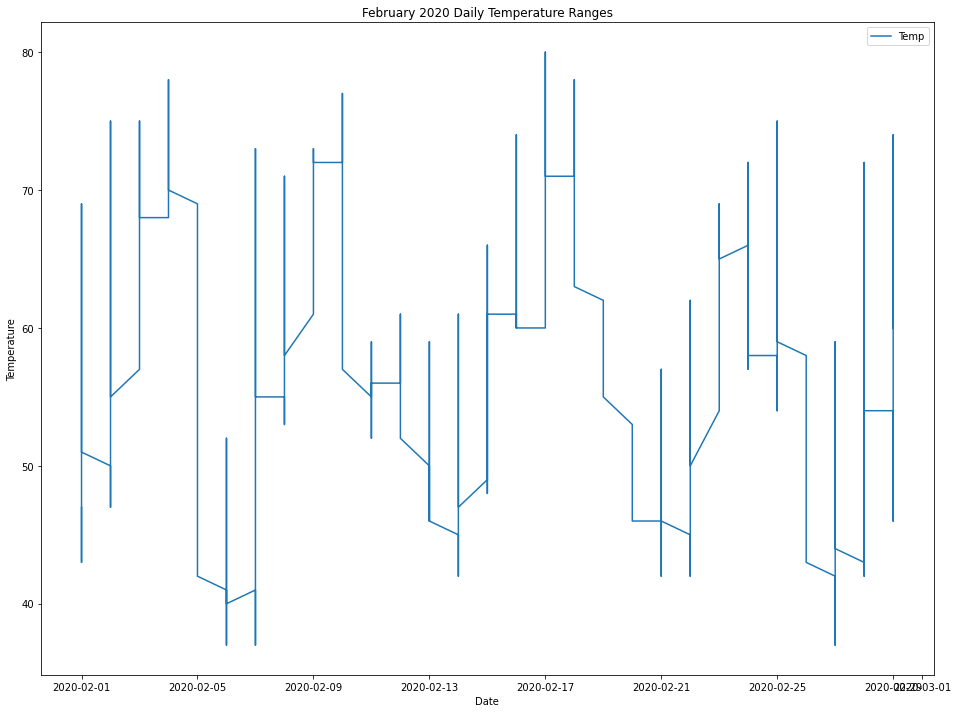

In [355]:
# Create a lineplot out of the WeatherUnderground 2020 dataframe
# This lineplot shows the range of temperatures on each day as a line, kind of like a candlestick chart

WU2020_df.plot(x='Date',
               y='Temp',
               ylabel='Temperature',
               title='February 2020 Daily Temperature Ranges',
               figsize=(16, 12)
)

Text(0, 0.5, 'Temperature')

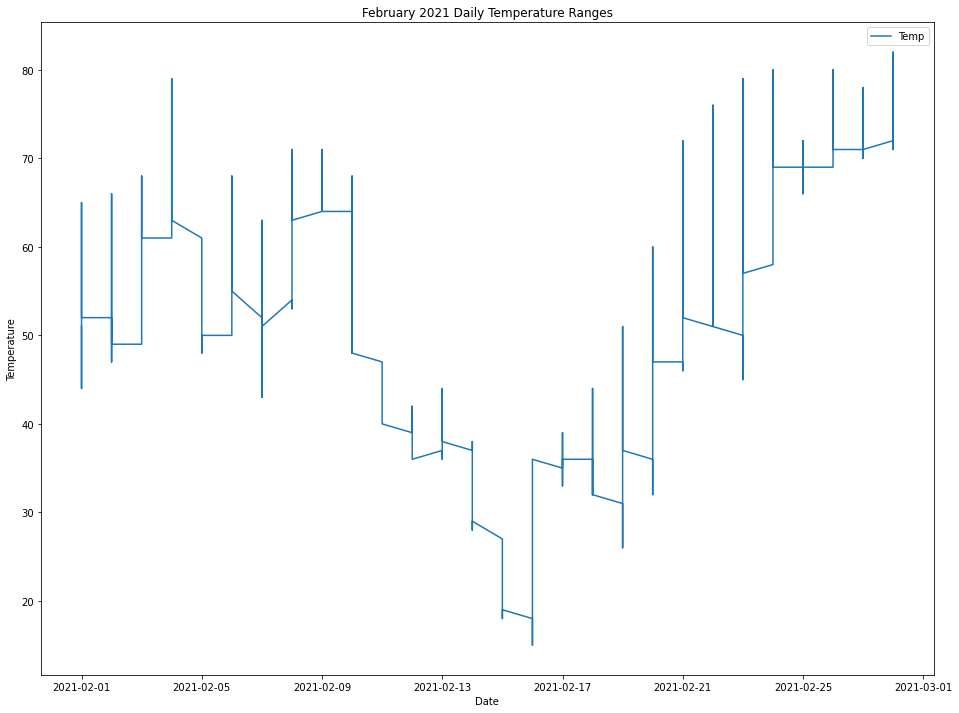

In [356]:
# Create a lineplot out of the WeatherUnderground 2021 dataframe

WU2021_df.plot(x='Date', y='Temp', figsize=(16, 12))

plt.title('February 2021 Daily Temperature Ranges')
plt.ylabel('Temperature')

In [357]:
# Drop Datetime and Hour columns from 2020 dataframe to prepare for the next visualizations

WU2020_df.drop(columns=['Datetime', 'Hour'], axis=1, inplace=True)

WU2020_df.head()

,Temp,Date,Day
0,47,2020-02-01,1
1,45,2020-02-01,1
2,45,2020-02-01,1
3,45,2020-02-01,1
4,44,2020-02-01,1


In [358]:
# Drop Datetime and Hour columns from the 2021 dataframe to prepare for next visualizations

WU2021_df.drop(columns=['Datetime', 'Hour'], axis=1, inplace=True)

WU2021_df.head()

,Temp,Date,Day
0,51,2021-02-01,1
1,50,2021-02-01,1
2,47,2021-02-01,1
3,47,2021-02-01,1
4,46,2021-02-01,1


In [359]:
# Create a new dataframe with the average temperature of each day in Feb 2020

WU2020dailyavg_df = WU2020_df.groupby('Date').mean().reset_index()

display(WU2020dailyavg_df)

,Date,Temp,Day
0,2020-02-01,55.000000,1.0
1,2020-02-02,59.666667,2.0
2,2020-02-03,67.500000,3.0
3,2020-02-04,72.600000,4.0
4,2020-02-05,50.111111,5.0
5,2020-02-06,42.962963,6.0
6,2020-02-07,55.833333,7.0
7,2020-02-08,61.200000,8.0
8,2020-02-09,69.000000,9.0
9,2020-02-10,72.054054,10.0


In [360]:
# Create a new dataframe with the average temperature of each day in Feb 2021

WU2021dailyavg_df = WU2021_df.groupby('Date').mean().reset_index()
display(WU2021dailyavg_df)

,Date,Temp,Day
0,2021-02-01,53.750000,1.0
1,2021-02-02,54.666667,2.0
2,2021-02-03,59.280000,3.0
3,2021-02-04,69.576923,4.0
4,2021-02-05,53.040000,5.0
5,2021-02-06,57.833333,6.0
6,2021-02-07,52.576923,7.0
7,2021-02-08,62.277778,8.0
8,2021-02-09,65.973684,9.0
9,2021-02-10,62.135135,10.0


Text(0, 0.5, 'Temperature')

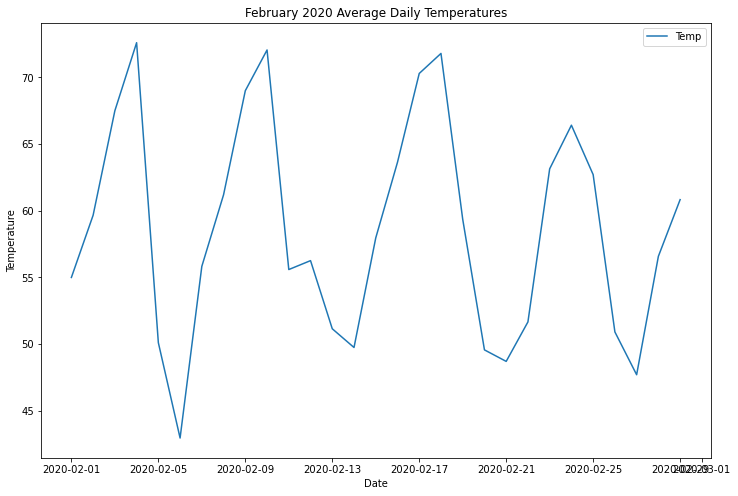

In [361]:
# Create a lineplot of the average daily temperatures from 2020

WU2020dailyavg_df.plot(x='Date', y='Temp', figsize=(12, 8))

plt.title('February 2020 Average Daily Temperatures')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

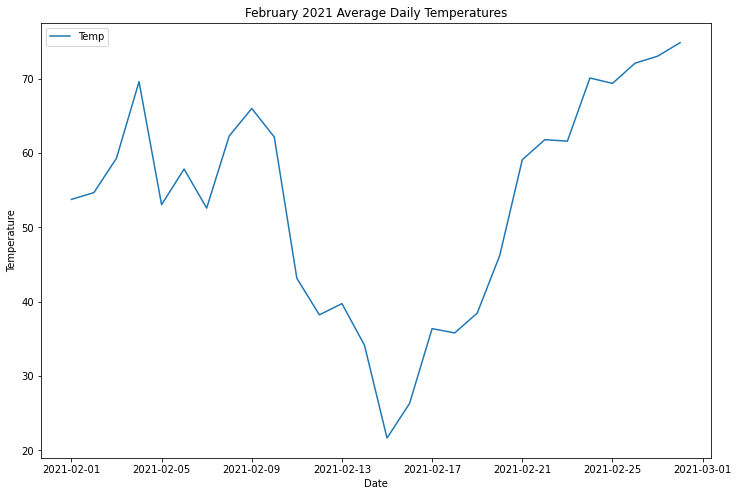

In [362]:
# Create a lineplot of the average daily temperatures from 2021

WU2021dailyavg_df.plot(x='Date', y='Temp', figsize=(12, 8))

plt.title('February 2021 Average Daily Temperatures')
plt.ylabel('Temperature')

In [363]:
# Drop the Date column from the daily average dataframe for 2020

WU2020dailyavg_df.drop(columns=['Date'], axis=1, inplace=True)

titles=["Day","Temp"]
WU2020dailyavg_df = WU2020dailyavg_df.reindex(columns=titles)
        
WU2020dailyavg_df.head()

,Day,Temp
0,1.0,55.000000
1,2.0,59.666667
2,3.0,67.500000
3,4.0,72.600000
4,5.0,50.111111


In [364]:
# Drop the Date column from the daily average dataframe for 2021

WU2021dailyavg_df.drop(columns=['Date'], axis=1, inplace=True)

titles=["Day","Temp"]
WU2021dailyavg_df = WU2021dailyavg_df.reindex(columns=titles)
        
WU2021dailyavg_df.head()

,Day,Temp
0,1.0,53.750000
1,2.0,54.666667
2,3.0,59.280000
3,4.0,69.576923
4,5.0,53.040000


In [380]:
# Create a dataframe with 2020 and 2021 average temps by merging and rename columns

DailyAvgDF = WU2020dailyavg_df.merge(WU2021dailyavg_df, on='Day', how='left')

DailyAvgDF.rename(columns={"Temp_x": "2020Temp", "Temp_y": "2021Temp"})

,Day,2020Temp,2021Temp
0,1.0,55.000000,53.750000
1,2.0,59.666667,54.666667
2,3.0,67.500000,59.280000
3,4.0,72.600000,69.576923
4,5.0,50.111111,53.040000
5,6.0,42.962963,57.833333
6,7.0,55.833333,52.576923
7,8.0,61.200000,62.277778
8,9.0,69.000000,65.973684
9,10.0,72.054054,62.135135


In [395]:
# Overlay the average temperatures from Feb 2020 and 2021 on top of each other to compare

# Temp_x = 2020 Temperatures
# Temp_y = 2021 Temperatures

DailyAvgDF.hvplot(x='Day', y=['Temp_x', 'Temp_y'], value_label="Temperature", legend='top', height=400,)

:NdOverlay   [Variable]
   :Curve   [Day]   (Temperature)

In [394]:
# Feb 2020 and 2021 averages with log applied to the y axis

# Normalized temp comparison

DailyAvgDF.hvplot(x='Day', y=['Temp_x', 'Temp_y'], value_label="Temperature", legend='top', height=400, logy=True)

:NdOverlay   [Variable]
   :Curve   [Day]   (Temperature)

<AxesSubplot:title={'center':'2020 vs 2021 Temperature Comparison'}, xlabel='Day', ylabel='Temperature'>

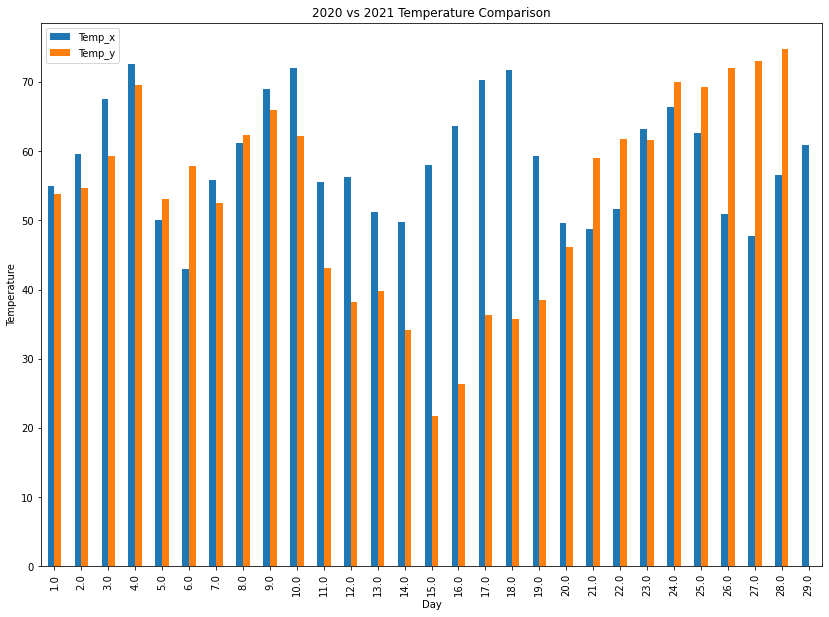

In [390]:
# Bar chart comparing daily averages from Feb 2020 and 2021

DailyAvgDF.plot(x="Day", y=["Temp_x", "Temp_y"], kind="bar", figsize=(14,10), ylabel="Temperature", title="2020 vs 2021 Temperature Comparison")